Rede Neural com [TensorFlow](https://www.tensorflow.org/tutorials/keras/classification?hl=pt-br) 



In [2]:
# TensorFlow e tf.keras
import tensorflow as tf
from tensorflow import keras

# Librariesauxiliares
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


Importar a base de dados Fashion MNIST

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
# carrega a base de dados
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
len(train_labels)

60000

In [8]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [9]:
test_images.shape

(10000, 28, 28)

In [10]:
len(test_labels)

10000

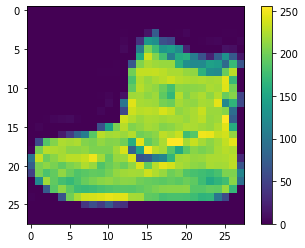

In [11]:
plt.figure()
plt.imshow(train_images[0])   # a primeira imagem (é uma bota)
plt.colorbar()
plt.grid(False)
plt.show()

In [12]:
train_images = train_images / 255.0

test_images = test_images / 255.0

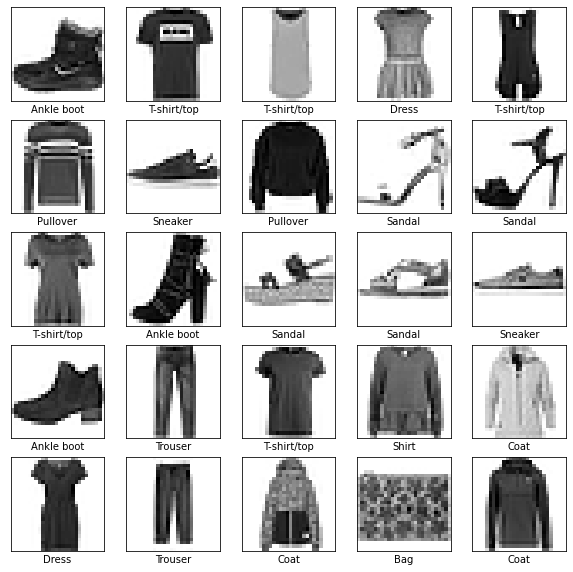

In [13]:
# mostra as primeiras 25
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [14]:
# montando as camadas
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [15]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4995 - accuracy: 0.8248
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3786 - accuracy: 0.8636
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3383 - accuracy: 0.8761
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3150 - accuracy: 0.8841
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2946 - accuracy: 0.8917
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2815 - accuracy: 0.8947
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2696 - accuracy: 0.9002
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2575 - accuracy: 0.9040
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2479 - accuracy: 0.9075
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.240

In [17]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3836 - accuracy: 0.8617

Test accuracy: 0.8616999983787537


In [18]:
predictions = model.predict(test_images)

In [19]:
predictions[0]

array([1.14435155e-08, 6.18854523e-09, 1.81313264e-09, 1.70367276e-10,
       7.75399123e-09, 7.01375830e-04, 4.75556362e-07, 4.06297389e-03,
       1.37252277e-06, 9.95233715e-01], dtype=float32)

In [20]:
np.argmax(predictions[0])

9

In [21]:
test_labels[0]

9

In [22]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

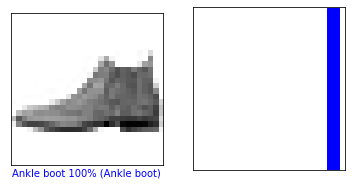

In [23]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

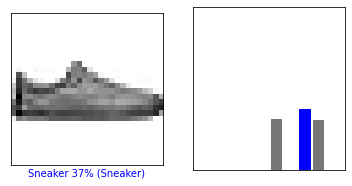

In [24]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

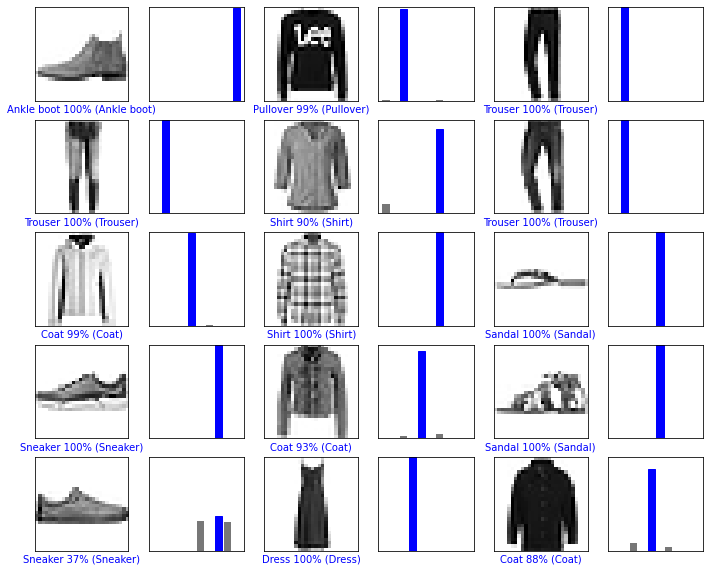

In [25]:
# Plota o primeiro X test images, e as labels preditas, e as labels verdadeiras.
# Colore as predições corretas de azul e as incorretas de vermelho.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [26]:
# Grab an image from the test dataset.
img = test_images[0]

print(img.shape)

(28, 28)


In [27]:
# Adiciona a imagem em um batch que possui um só membro.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [28]:
predictions_single = model.predict(img)

print(predictions_single)

[[1.1443538e-08 6.1885688e-09 1.8131361e-09 1.7036728e-10 7.7539770e-09
  7.0137548e-04 4.7555682e-07 4.0629739e-03 1.3725240e-06 9.9523371e-01]]


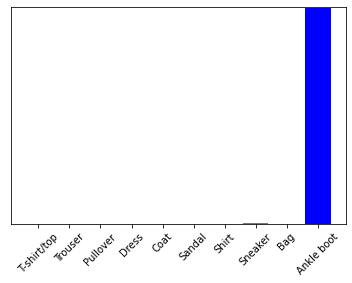

In [29]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [30]:
np.argmax(predictions_single[0])

9